• DOMAIN: Botanical research

• **CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of
flowers. They already have have invested on curating sample images. They require an automation which can
create a classifier capable of determining a flower’s species from a photo

• **DATA DESCRIPTION:** The dataset comprises of images from 17 plant species. It can be downloaded from
TensorFlow [ Hint: import tflearn.datasets.oxflower17 as oxflower17 ]

• **PROJECT OBJECTIVE:** Company’s management requires an automation which can create a classifier capable of
determining a flower’s species from a photo

**Steps and tasks:**
1. Import the data. Analyse the dimensions of the data.
2. Preprocess the data.
3. Data visualisation:
• Display the images
• Display the labels
• Display images vs labels
• Apply different filters [ for example: blur, contour, edge detection, emboss, smooth etc.] on the images and
display the image.
4. Train tune and test AIML image classifier model using:
• Use your own designed CNN for training
• Use transferred learning models for training
• Compare the results from the above 2 steps along with your detailed observations.
5. Explain in depth your strategy to maintain and support the AIML image classifier after it in production.

In [ ]:
#Command to install tflearn library is its not present 
!pip install tflearn

     |████████████████████████████████| 112kB 32.6MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127300 sha256=72742dbf6c455773ac28164301e5d08d72e87087b27debe72e78f1d10a350a94
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


# Importing Libraries

In [ ]:
#Importning Important Libraries

#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Importing Numpy, Pandas and Matplotlib libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17 

#Importing neccessary libraries from sklearn
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#Importing neccessary libraries from tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping

#Importing cv2 libraries
import cv2

Instructions for updating:
non-resource variables are not supported in the long term


# 1. Import the data. Analyse the dimensions of the data.

In [ ]:
#Loading oxflower17 dataset into a variable
data = oxflower17.load_data()

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [ ]:
data[0].shape # These represents the images array

(1360, 224, 224, 3)

**There are 1360 images in the dataset of size 224 X 224 X 3. 
Here 3 represents the colour channel RGB i.e images are colored**

In [ ]:
data[1].shape # These represents the labels for images

(1360,)

# 2. Preprocess the data.

In [ ]:
X = data[0]  # Defining X or 'Input features'

In [ ]:
y = data[1].reshape(1360,1) # Defining y or 'target/labels'

In [ ]:
# Spliting data into train and test in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Shape of X_train after split
X_train.shape

(1088, 224, 224, 3)

In [ ]:
# Shape of X_test after split
X_test.shape

(272, 224, 224, 3)

In [ ]:
# Shape of y_train after split
y_train.shape

(1088, 1)

In [ ]:
# Shape of y_test after split
y_test.shape

(272, 1)

In [ ]:
# Details stored in the first position on X_train 
X_train[0] # It represents the pixel values of the image in form of an array

array([[[0.45882353, 0.61960787, 0.8       ],
        [0.45882353, 0.61960787, 0.8       ],
        [0.45490196, 0.6156863 , 0.79607844],
        ...,
        [0.5411765 , 0.7019608 , 0.88235295],
        [0.5372549 , 0.69803923, 0.8784314 ],
        [0.5372549 , 0.69803923, 0.8784314 ]],

       [[0.44705883, 0.60784316, 0.7882353 ],
        [0.44705883, 0.60784316, 0.7882353 ],
        [0.44705883, 0.60784316, 0.7882353 ],
        ...,
        [0.5411765 , 0.7019608 , 0.88235295],
        [0.5411765 , 0.7019608 , 0.88235295],
        [0.5411765 , 0.7019608 , 0.88235295]],

       [[0.4509804 , 0.6117647 , 0.7921569 ],
        [0.4509804 , 0.6117647 , 0.7921569 ],
        [0.45882353, 0.61960787, 0.8       ],
        ...,
        [0.54509807, 0.7058824 , 0.8862745 ],
        [0.54509807, 0.7058824 , 0.8862745 ],
        [0.54509807, 0.7058824 , 0.8862745 ]],

       ...,

       [[0.19607843, 0.33333334, 0.06666667],
        [0.1882353 , 0.3254902 , 0.05882353],
        [0.1882353 , 0

In [ ]:
# Label for the image at the first postion
y_train[0]

array([16])

# 3. Data visualisation:


**(a) Display the images**

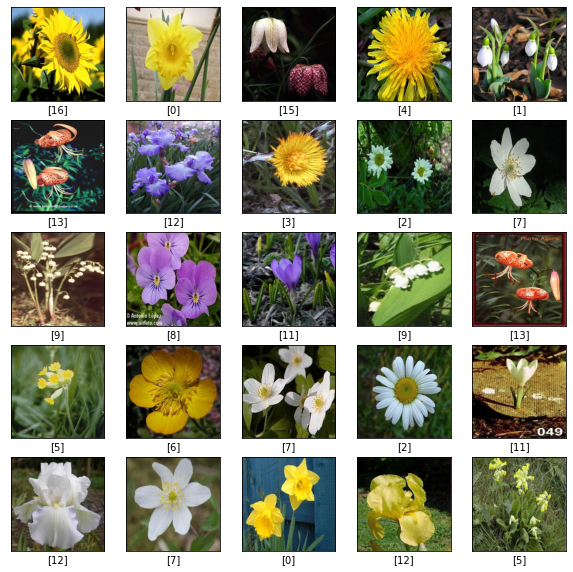

In [ ]:
# Code to display first 25 images in the dataset along with its labels
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

**(b) Display the labels**

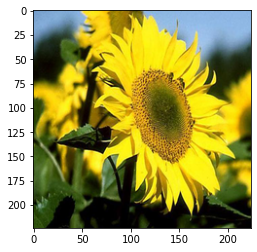

In [ ]:
#Plotting the image at the first position
plt.imshow(X_train[0])

In [ ]:
#Displaying the label for the image at the first position
y_train[0]

array([16])

**(c) Apply different filters : blur**

In [ ]:
new_image = cv2.blur(X_train[0],(9,9))

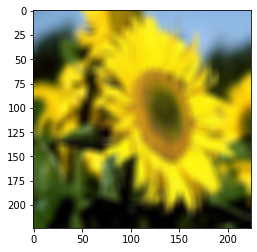

In [ ]:
plt.imshow(new_image)

**Apply different filters : contours**

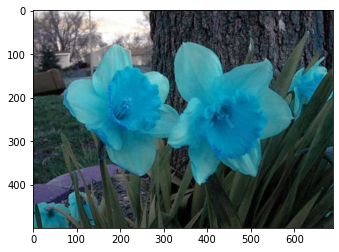

In [ ]:
img = cv2.imread('/content/17flowers/jpg/0/image_0001.jpg',cv2.IMREAD_UNCHANGED)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


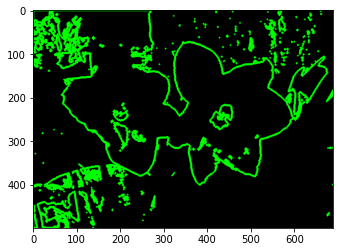

In [ ]:

#convert img to grey
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 100
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
#save image
cv2.imwrite('/content/contours.png',img_contours) 
plt.imshow(img_contours)

**Appling different filters : Edge detection**

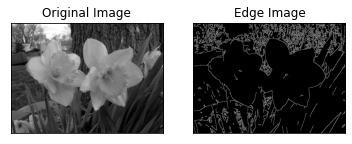

In [ ]:
img = cv2.imread('/content/17flowers/jpg/0/image_0001.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

**Appling filter : Smoothening**

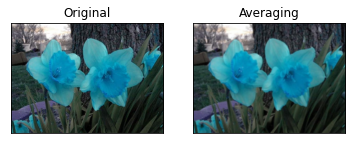

In [ ]:
img = cv2.imread('/content/17flowers/jpg/0/image_0001.jpg')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

**Checking Min() and Max() pixel values in image**

In [ ]:
# Max pixel value in the image
X_train[0].max()

1.0

In [ ]:
# min pixel value in the image
X_train[0].min()

0.0

**There is no need to normalize the input images as the pixel values already lies between 0 to 1**


In [ ]:
# Labels of the images are present as an array in y_train and y_test
y_train 

array([[16],
       [ 0],
       [15],
       ...,
       [14],
       [ 2],
       [14]])

In [ ]:
y_test[:5] #Selecting top 5 labels from y_test

array([[13],
       [11],
       [ 2],
       [ 7],
       [ 6]])

# 4. Train tune and test AIML image classifier model using:


**Use your own designed CNN for training**

In [ ]:
#Converting target labels into categorical variables using one hot encoding 
y_cat_train = to_categorical(y_train,17)
y_cat_test = to_categorical(y_test,17)

In [ ]:
#Initializing ImageDataGenerator object 
datagen = ImageDataGenerator(
    featurewise_center=True,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# fits the model on batches with real-time data augmentation:
datagen.fit(X_train)


In [ ]:
#Clear any previous model from memory
clear_session()

#Initialize model
model = Sequential()

#Add Conv Layer
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(224,224,3),activation='relu'))
#Add Max Pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#Add Conv Layer
model.add(Conv2D(filters=128,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#Add Max Pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#Add Conv Layer
model.add(Conv2D(filters=256,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#Add Max Pool layer
model.add(MaxPool2D(pool_size=(2,2)))

#Add Dense Layers after flattening the data
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#Output layer
model.add(Dense(17,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 221, 221, 64)      3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 128)     131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 256)       524544    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor="val_acc",patience=10)

In [ ]:
# fits the model on batches with real-time data augmentation:
model.fit(datagen.flow(X_train, y_cat_train, batch_size=68,
         subset='training'),
         validation_data=datagen.flow(X_test, y_cat_test,
         batch_size=17, subset='validation'),
         steps_per_epoch=len(X_train) / 68, epochs=100,callbacks=[early_stop])

Epoch 1/100
16/16 [==============================] - 45s 640ms/step - batch: 7.5000 - size: 67.1875 - loss: 2.6700 - acc: 0.1274 - val_loss: 2.2196 - val_acc: 0.1481
Epoch 2/100
16/16 [==============================] - 11s 729ms/step - batch: 7.5000 - size: 66.3750 - loss: 2.0335 - acc: 0.3107 - val_loss: 1.4081 - val_acc: 0.4444
Epoch 3/100
16/16 [==============================] - 12s 757ms/step - batch: 7.5000 - size: 68.0000 - loss: 1.6611 - acc: 0.4403 - val_loss: 1.4884 - val_acc: 0.3889
Epoch 4/100
16/16 [==============================] - 11s 728ms/step - batch: 7.5000 - size: 66.3750 - loss: 1.5468 - acc: 0.4501 - val_loss: 1.3373 - val_acc: 0.4630
Epoch 5/100
16/16 [==============================] - 12s 754ms/step - batch: 7.5000 - size: 66.3750 - loss: 1.4112 - acc: 0.4981 - val_loss: 1.2242 - val_acc: 0.5000
Epoch 6/100
16/16 [==============================] - 12s 769ms/step - batch: 7.5000 - size: 68.0000 - loss: 1.3288 - acc: 0.5441 - val_loss: 1.1147 - val_acc: 0.5370
Epoc

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,acc,val_loss,val_acc
0,2.669550,0.127442,2.219590,0.148148
1,2.038372,0.310734,1.408147,0.444444
2,1.661085,0.440257,1.488440,0.388889
3,1.546706,0.450094,1.337279,0.462963
4,1.411407,0.498117,1.224224,0.500000
5,1.328839,0.544118,1.114714,0.537037
6,1.276174,0.560264,0.914370,0.703704
7,1.134866,0.608372,1.035527,0.629630
8,1.120128,0.602791,0.873951,0.685185
9,1.024630,0.641860,0.842637,0.629630


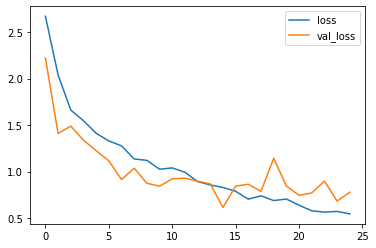

In [ ]:
metrics[['loss','val_loss']].plot()

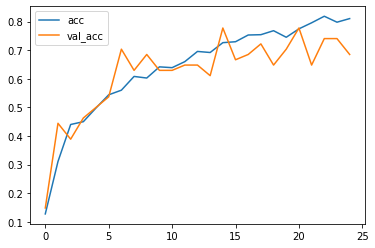

In [ ]:
metrics[['acc','val_acc']].plot()

In [ ]:
model.evaluate(X_test,y_cat_test)

[4.465619928696576, 0.33088234]

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.17      0.50      0.25        20
           1       0.33      0.07      0.11        15
           2       0.00      0.00      0.00        16
           3       0.35      0.32      0.33        19
           4       0.43      0.21      0.29        14
           5       0.50      0.17      0.25        18
           6       0.64      0.50      0.56        18
           7       0.44      0.29      0.35        14
           8       1.00      0.32      0.48        19
           9       0.44      0.62      0.52        13
          10       0.38      0.21      0.27        14
          11       0.73      0.50      0.59        16
          12       0.17      0.89      0.29        19
          13       1.00      0.31      0.47        13
          14       0.00      0.00      0.00        14
          15       0.71      0.38      0.50        13
          16       1.00      0.18      0.30        17

    accuracy              

**We can see that the model is performing very badly. The performance still can be imporved by tuning the hyperparemeters and also playing with kernel and kernel sizes in hidden layers and adding different layers like dropouts, batchnormalization,etc. But lets try transferlearning in the below section to see how it performs.**

In [ ]:
confusion_matrix(y_test,predictions)

array([[10,  0,  1,  2,  0,  1,  1,  0,  0,  0,  0,  0,  5,  0,  0,  0,
         0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  3,  0,  0,  2,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0, 12,  0,  0,  0,
         0],
       [ 3,  0,  0,  6,  2,  1,  1,  1,  0,  0,  0,  0,  5,  0,  0,  0,
         0],
       [ 4,  0,  0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,
         0],
       [12,  0,  0,  1,  0,  3,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
         0],
       [ 4,  0,  0,  0,  1,  1,  9,  0,  0,  0,  0,  0,  3,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  0,  1,  0,  0,  9,  0,  0,  0,
         0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  6,  0,  1,  0,  8,  0,  0,  0,
         0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,
         0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  3,  2,  6,  0,  0,  0,
         0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  2,  8,  4,  0,  

In [ ]:
import seaborn as sns

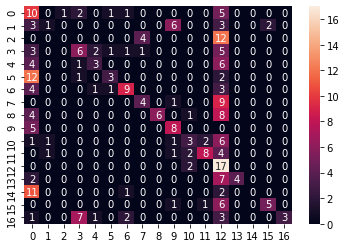

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

**Checking model prediction**

In [ ]:
my_image = X_test[0]

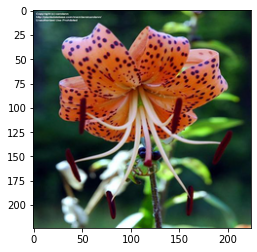

In [ ]:
plt.imshow(my_image)

In [ ]:
y_test[0]

array([13])

In [ ]:
model.predict_classes(my_image.reshape(1,224,224,3))

array([13])

**Somehow model has predicted the class correctly but it may not be correct for other exapmles as the accuracy of the model is not good**

**Use transferred learning models for training**

In [ ]:
from tensorflow.keras.applications import VGG16

#Clear any previous model from memory
clear_session()

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers except for the last layer: 
for layer in vgg_conv.layers[:-3]:
    layer.trainable = False
 
 
# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 

#Add flattening layer
model.add(Flatten())

#Output layer
model.add(Dense(17,activation='softmax'))

model.summary() 

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 17)                426513    
Total params: 15,141,201
Trainable params: 5,146,129
Non-trainable params: 9,995,072
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor="val_acc",patience=10)

In [ ]:
# fits the model on batches with real-time data augmentation:
model.fit(datagen.flow(X_train, y_cat_train, batch_size=100,
         subset='training'),
         validation_data=datagen.flow(X_test, y_cat_test,
         batch_size=17, subset='validation'),
         steps_per_epoch=len(X_train) / 100, epochs=100,callbacks=[early_stop])

Epoch 1/100
10/10 [==============================] - 40s 2s/step - batch: 5.0000 - size: 97.3636 - loss: 2.7284 - acc: 0.1746 - val_loss: 1.8424 - val_acc: 0.3704
Epoch 2/100
10/10 [==============================] - 8s 796ms/step - batch: 5.0000 - size: 94.7273 - loss: 1.7775 - acc: 0.3906 - val_loss: 1.2331 - val_acc: 0.5741
Epoch 3/100
10/10 [==============================] - 11s 1s/step - batch: 5.0000 - size: 97.3636 - loss: 1.3168 - acc: 0.5490 - val_loss: 0.9513 - val_acc: 0.6667
Epoch 4/100
10/10 [==============================] - 11s 1s/step - batch: 5.0000 - size: 100.0000 - loss: 0.8859 - acc: 0.7182 - val_loss: 0.5752 - val_acc: 0.7037
Epoch 5/100
10/10 [==============================] - 11s 1s/step - batch: 5.0000 - size: 94.7273 - loss: 0.7688 - acc: 0.7418 - val_loss: 0.8669 - val_acc: 0.7407
Epoch 6/100
10/10 [==============================] - 11s 1s/step - batch: 5.0000 - size: 97.3636 - loss: 0.6188 - acc: 0.8067 - val_loss: 0.4873 - val_acc: 0.7778
Epoch 7/100
10/10 [

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,acc,val_loss,val_acc
0,2.731220,0.174603,1.842421,0.370370
1,1.782145,0.390595,1.233061,0.574074
2,1.327234,0.549020,0.951295,0.666667
3,0.885881,0.718182,0.575235,0.703704
4,0.766229,0.741843,0.866880,0.740741
5,0.618922,0.806723,0.487314,0.777778
6,0.457191,0.857965,0.420607,0.833333
7,0.335088,0.886088,0.537372,0.777778
8,0.320255,0.898226,0.425579,0.870370
9,0.260334,0.916900,0.537723,0.907407


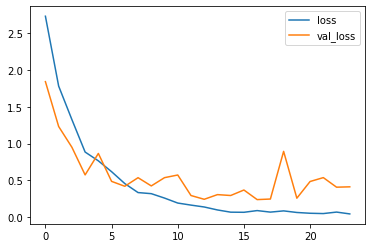

In [ ]:
metrics[['loss','val_loss']].plot()

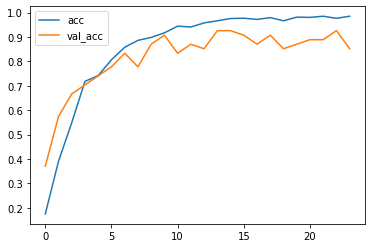

In [ ]:
metrics[['acc','val_acc']].plot()

In [ ]:
model.evaluate(X_test,y_cat_test)

[0.3037269702729057, 0.9191176]

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.92      0.80      0.86        15
           2       0.89      1.00      0.94        16
           3       1.00      0.95      0.97        19
           4       0.93      1.00      0.97        14
           5       0.79      0.83      0.81        18
           6       1.00      0.78      0.88        18
           7       1.00      1.00      1.00        14
           8       1.00      0.95      0.97        19
           9       0.93      1.00      0.96        13
          10       1.00      0.93      0.96        14
          11       0.94      0.94      0.94        16
          12       0.95      0.95      0.95        19
          13       0.81      1.00      0.90        13
          14       0.65      0.79      0.71        14
          15       1.00      1.00      1.00        13
          16       1.00      0.82      0.90        17

    accuracy              

Accuracy of the model is 80%, for some of the class its performing better than 90% may be due to the class imparity it the dataset. 

In [ ]:
confusion_matrix(y_test,predictions)

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,  0,  0,
         0],
       [ 0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0, 18,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 1,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0],
       [ 0,  0,  0,  0,  0,  3, 14,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  1,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  

In [ ]:
import seaborn as sns

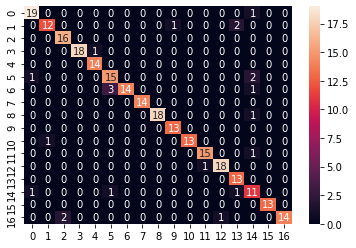

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [ ]:
my_image = X_test[0]

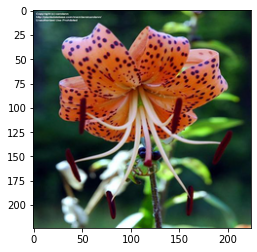

In [ ]:
plt.imshow(my_image)

In [ ]:
y_test[0]

array([13])

In [ ]:
model.predict_classes(my_image.reshape(1,224,224,3))

array([13])

**Compare the results from the above 2 steps along with your detailed observations.**

***We can see that the transer learning model (VGG16) is performing way better than the model defined above. Its the advantage of using transfer learning as features are already learnt with highest accuracy thus no need to train the already trained parameters and use it directly in some scenarios. We could also improve the performance of our own model by tuning some of the hyperparameter and playing away with no. of kernels in hidden layer and also kernel sizes.***

# 5. Explain in depth your strategy to maintain and support the AIML image classifier after it in production.



*   The key element of the monitoring framework is to identify which input samples deviate significantly from the patterns seen in the training data and then have those samples closely examined by a human expert.
*   During the model monitoring phase, we can identify the samples that led to a particular output but the path traversed through the three modules wasn’t one of the paths observed during the training phase for that output.
*   This calls for reactive model monitoring which performs root-cause-analysis (RCA) of the customer escalations and provides an estimate of when the bugs will be fixed.
*   Just like accurate medical diagnosis comes from analysis of the patient’s history, proactive model maintenance has to be broad enough to quickly help identify the root cause of a customer escalation.
*   This means the data science teams will now have to maintain two models! This opens up a whole new area of discussion called ‘technical debt of machine learning models’. Consistency can trump accuracy.









Based on business objective, from recent model results, get the accuracy score on positive data, and negative data, and get reconstruction error value from the AE model. With these three values, we can evaluate the effectiveness of the model. Let us see the possible actions we can take related to model effectiveness

 


Actions 1:  Retrain the model with new data: When the model produced high accuracy score and negative test accuracy is also significantly high, get the reconstruction error value from the AE model with recent data. If the reconstruction error value is low the data is not changed much. The next best action will be retraining the model with recent data.

Actions 2:  Retrain the model with additional features: When the model produced a low accuracy score on both positive and negative dataset accuracy is significantly high.  , the reconstruction error value is low that indicates that data is not changed much but we need to tune the model with new features. In this case, you already have the data you need, but retraining the same model on the same data is not going to help. The action would be develop new features by doing the feature-engineering step and retrain the model with additional features. Remember to preserve the features from the original model.
 
Actions 3:  Develop a new model from scratch : When the model produced a low accuracy score on recent positive data and negative test accuracy is significantly high. Furthermore, the reconstruction error value is also high for recent input data is a clear indication that the new recent input data is much different and has new features than the model originally trained.  The next nest action would be repeating the process of feature extraction, then build, and train a new model from scratch.

Final thoughts

·        How often we needed to validate the model is depends on the frequency of model consumed and the rate the base data will change over time. Understanding the business problem will help to determine the frequency of validating the model. When deploy the model, having a plan to validate the model will be good practice.

·        Even though getting feedback directly from users and incorporate them into the model is great but in practice, getting timely feedback is hard and challenge to implement auto-tune the model. Try to find the model results from the business result, instance a call (call-turned-to-customer) success rate on recommendation model from the call history data than solely depend on the users’ feedback.

·        In practice, ingesting negative test data into the model is not an option for many business problems. In those scenarios, the AE model and average accuracy score from the model in a specific period can be used to validate the effectiveness of the model.

